In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = train_images.reshape(60000,784)
x_test = test_images.reshape(10000,784)
x_train = x_train/255.0
x_test = x_test/255.0
y_train = np.reshape(train_labels, (len(train_labels), 1))

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
Training the MLP model:

In [ ]:
tf.random.set_seed(42)

model_mlp = tf.keras.Sequential([
    
    tf.keras.layers.Dense(104, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
    
])

model_mlp.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

In [ ]:

history = model_mlp.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_val, y_val)
)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.7034 - accuracy: 0.7795 - val_loss: 0.2190 - val_accuracy: 0.9377
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3365 - accuracy: 0.9114 - val_loss: 0.1629 - val_accuracy: 0.9555
Epoch 3/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2633 - accuracy: 0.9315 - val_loss: 0.1428 - val_accuracy: 0.9602
Epoch 4/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2223 - accuracy: 0.9427 - val_loss: 0.1320 - val_accuracy: 0.9650
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2031 - accuracy: 0.9479 - val_loss: 0.1372 - val_accuracy: 0.9646
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1806 - accuracy: 0.9548 - val_loss: 0.1200 - val_accuracy: 0.9690
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1738 - accuracy: 0.9561 - val_loss: 0.1206 - val_accuracy:

In [ ]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 104)                 81640     
                                                                 
 dropout (Dropout)           (32, 104)                 0         
                                                                 
 dense_1 (Dense)             (32, 62)                  6510      
                                                                 
 dropout_1 (Dropout)         (32, 62)                  0         
                                                                 
 dense_2 (Dense)             (32, 32)                  2016      
                                                                 
 dropout_2 (Dropout)         (32, 32)                  0         
                                                                 
 dense_3 (Dense)             (32, 16)                  5

In [ ]:
predictions_mlp = model_mlp.predict(x_test)
y_preds_mlp = predictions_mlp.argmax(axis =1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Training the CNN model

In [ ]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(28, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(56, (5, 5), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(56, activation='relu'))
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history_cnn = model_cnn.fit(train_images, train_labels, epochs=30,validation_data=(val_images, val_labels))


Epoch 1/30
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0884 - val_accuracy: 0.9900
Epoch 2/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0774 - val_accuracy: 0.9914
Epoch 3/30
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.1022 - val_accuracy: 0.9889
Epoch 4/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0781 - val_accuracy: 0.9906
Epoch 5/30
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0743 - val_accuracy: 0.9918
Epoch 6/30
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0859 - val_accuracy: 0.9919
Epoch 7/30
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.1132 -

In [ ]:
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 56)          39256     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 56)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense_5 (Dense)             (None, 56)               

In [ ]:
predictions_cnn = model_cnn.predict(test_images)
y_preds_cnn = predictions_cnn.argmax(axis =1)

313/313 [==============================] - 4s 13ms/step


Performance Comparision
Comparing the results for each class


In [ ]:
print("Report for MLP")
print(classification_report(test_labels, y_preds_mlp))

Report for MLP
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.95      0.98      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print("Report for CNN")
print(classification_report(test_labels, y_preds_cnn))

Report for CNN
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, title="Confusion MAtrix"): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title=title,
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

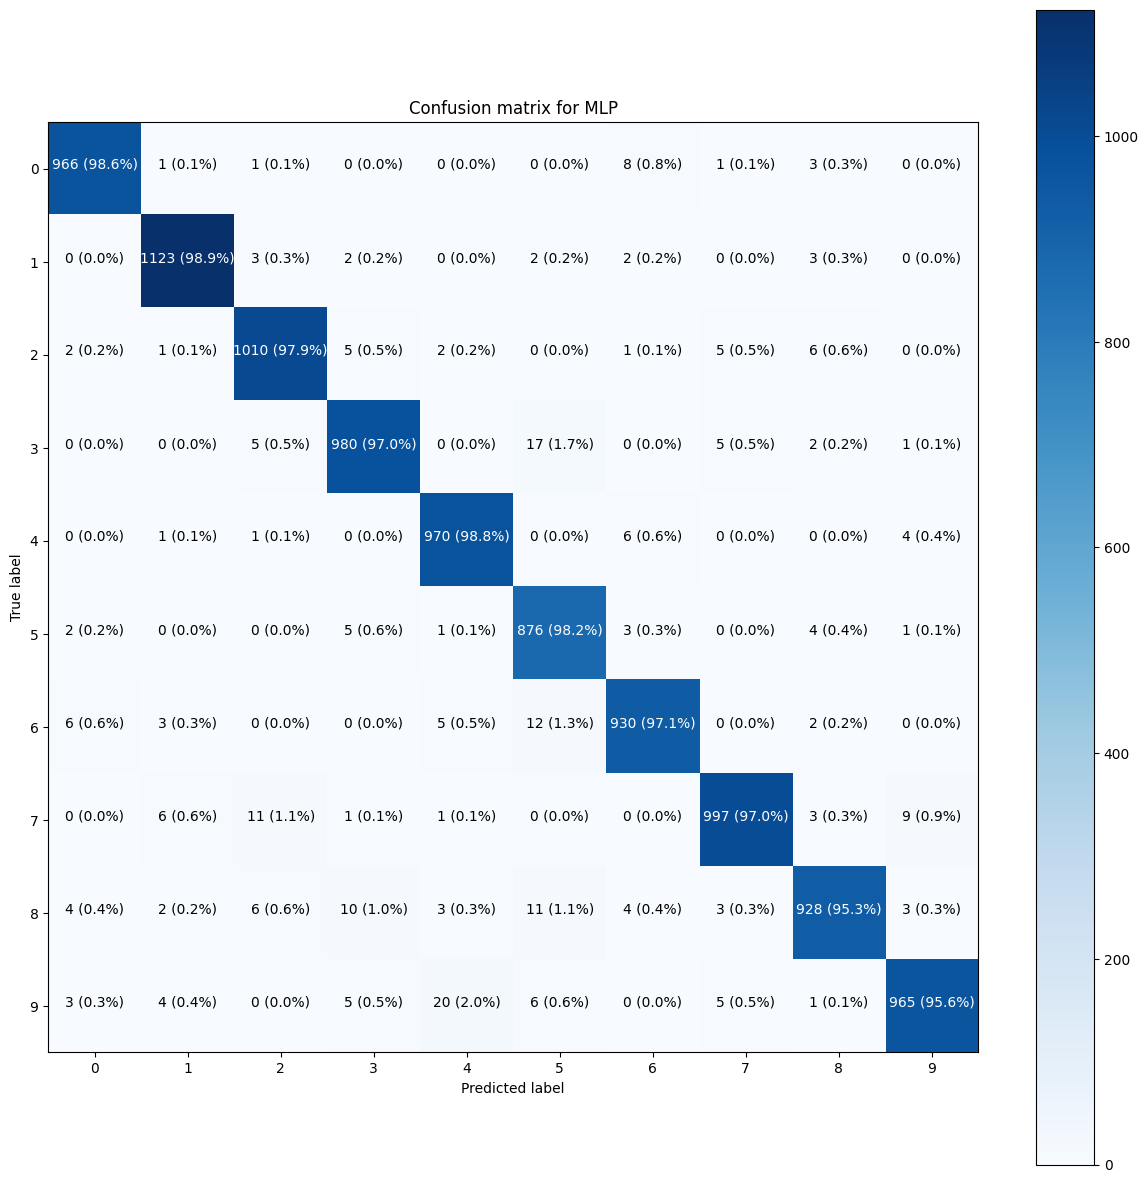

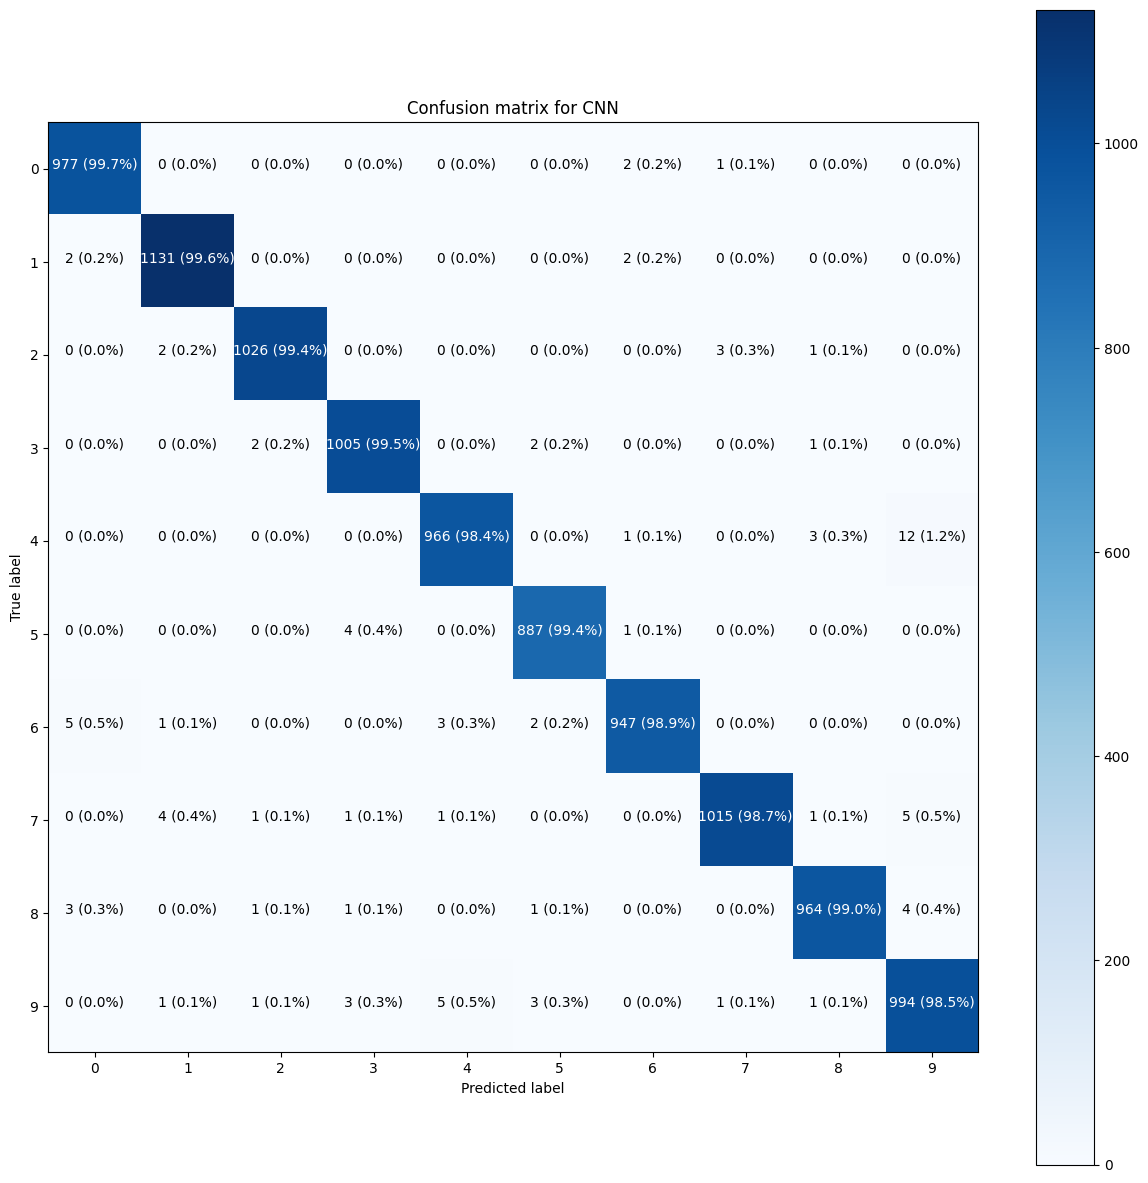

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds_mlp,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10,
                      title = "Confusion matrix for MLP")

make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds_cnn,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10,
                      title = "Confusion matrix for CNN")